# Task
Predict the closing price of a stock using historical data from "Stockprice.csv", implement a Random Forest model, and show a graph comparing actual vs predicted prices for the test data.

## Load the data

### Subtask:
Load the data from the `Stockprice.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data from the CSV file into a DataFrame, then display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv('Stockprice.csv')
display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## Preprocess the data

### Subtask:
Handle missing values and scale the data.


**Reasoning**:
Check for missing values and handle them, then select features and scale them using MinMaxScaler.



In [2]:
print("Missing values before handling:")
print(df.isnull().sum())

# Since there are no missing values, we proceed to select features and scale the data.
from sklearn.preprocessing import MinMaxScaler

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled features (first 5 rows):")
display(pd.DataFrame(X_scaled, columns=features).head())

Missing values before handling:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Scaled features (first 5 rows):


,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Import the train_test_split function and split the data into training and testing sets.



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train the model

### Subtask:
Train a Random Forest model on the training data.


**Reasoning**:
Train a Random Forest model on the training data.



In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Make predictions

### Subtask:
Make predictions on the test data using the trained model.


**Reasoning**:
Use the trained Random Forest model to make predictions on the test set features.



In [5]:
y_pred = model.predict(X_test)

## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics.


**Reasoning**:
Calculate and print the MSE and R-squared metrics to evaluate the model's performance.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 27.712524452933913
R-squared (R2) Score: 0.9976232946094691


## Visualize the results

### Subtask:
Create a graph comparing the actual and predicted prices for the test data.


**Reasoning**:
Generate a scatter plot to compare the actual and predicted prices with a diagonal line representing perfect predictions.



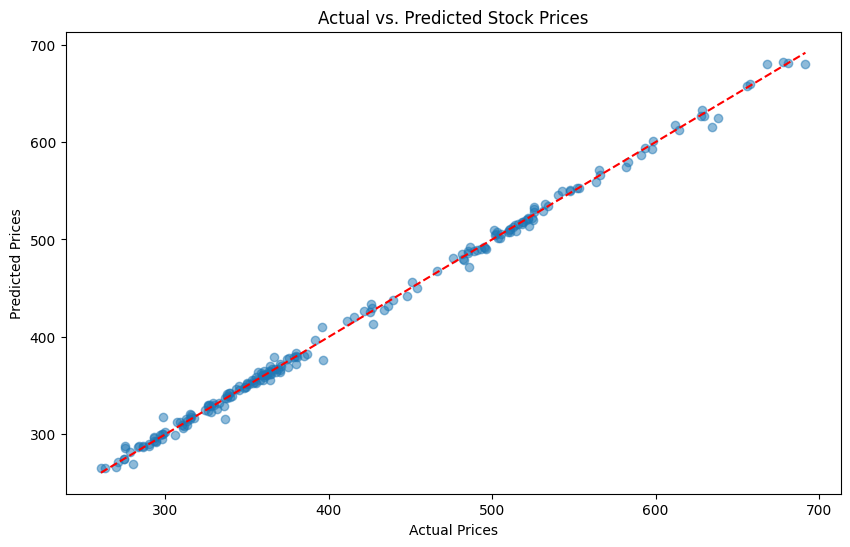

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Stock Prices")

# Add a diagonal line for perfect predictions
min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--')

plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and contained no missing values.
*   Features 'Open', 'High', 'Low', and 'Volume' were selected and scaled using `MinMaxScaler`.
*   The data was split into training and testing sets with 20% allocated for testing.
*   A Random Forest Regressor model was trained on the training data.
*   Predictions were made on the test set.
*   The model achieved a Mean Squared Error (MSE) of approximately 27.71 and an R-squared (R2) score of approximately 0.9976, indicating a good fit to the data.
*   A scatter plot comparing the actual and predicted stock prices for the test data visually confirmed the model's performance, with predictions closely following the actual prices along the diagonal line representing perfect predictions.

### Insights or Next Steps

*   The high R-squared score suggests that the Random Forest model performed very well in predicting stock closing prices based on the selected features.
*   Future steps could involve exploring additional features (e.g., technical indicators, sentiment data), tuning the Random Forest model's hyperparameters, or comparing its performance against other regression models to potentially improve accuracy or robustness.
